In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Martensitic stainless steels(315).csv")
df.head()

,Steel,Condition,Tensile Strength (MPa),Tensile Strength (ksi),Yield Strength (MPa),Yield Strength (ksi),Elongation in 50 mm (%),Reduction in Area (%),Hardness (HB),HV (GPa)
0,414,Annealed bar,795,115,620,90,20,60,235,22.757390
1,414,Cold drawn bar,895,130,795,115,15,58,270,26.146789
2,420,Annealed bar,655,95,345,50,25,55,195,18.883792
3,420,Annealed and cold drawn,760,110,690,100,14,40,228,22.079511
4,431,Annealed bar,860,125,655,95,20,55,260,25.178389


In [3]:
first_column_list = df.iloc[:, 0].tolist()
unique_values = list(set(first_column_list))
print(unique_values)

['414', '440C', '431', '420']


In [23]:
df['YS/TS Ratio'] = df['Yield Strength (MPa)'] / df['Tensile Strength (MPa)']
df.head()

,Steel,Condition,Tensile Strength (MPa),Tensile Strength (ksi),Yield Strength (MPa),Yield Strength (ksi),Elongation in 50 mm (%),Reduction in Area (%),Hardness (HB),YS/TS Ratio
0,403,Annealed bar,515,75,275,40,35,70,82 HRB,0.533981
1,403,Tempered bar,765,111,585,85,23,67,97 HRB,0.764706
2,410,Oil quenched from 980 °C (1800 °F); tempered a...,1525,221,1225,178,15,64,45 HRB,0.803279
3,414,Annealed bar,795,115,620,90,20,60,235,0.779874
4,414,Cold drawn bar,895,130,795,115,15,58,270,0.888268


<Axes: title={'center': 'YS/TS Ratio vs Hardness'}, xlabel='Hardness (HB)', ylabel='YS/TS Ratio'>

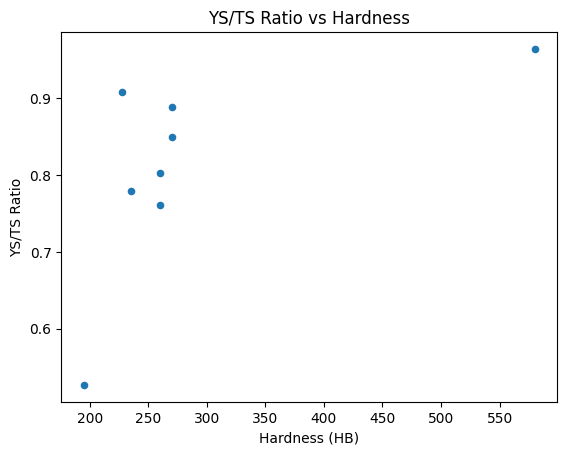

In [24]:

df['Hardness (HB)'] = pd.to_numeric(df['Hardness (HB)'], errors='coerce')
df_cleaned = df.dropna(subset=['Hardness (HB)', 'YS/TS Ratio'])
df_cleaned.plot(x='Hardness (HB)', y='YS/TS Ratio', kind='scatter', title='YS/TS Ratio vs Hardness')

In [49]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
X = df_cleaned[['Yield Strength (MPa)', 'YS/TS Ratio', 'Tensile Strength (MPa)']].values
y = df_cleaned['Hardness (HB)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=8, verbose=0)


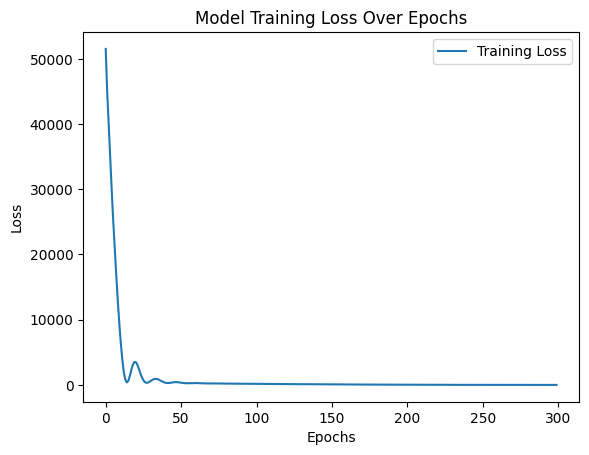

In [51]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss Over Epochs')
plt.legend()
plt.show()

In [52]:

# Predict on the test set
y_pred = model.predict(X_test).flatten()

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

# Compute R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Mean Squared Error (MSE): 216.30920769326622
R-squared (R²): 0.9889664546964462


In [55]:
# Predict on the training set
y_train_pred = model.predict(X_train).flatten()

# Compute R-squared for training data
r2_train = r2_score(y_train, y_train_pred)

print(f"R-squared (R²) for Training Data: {r2_train}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R-squared (R²) for Training Data: 0.9965885052914151


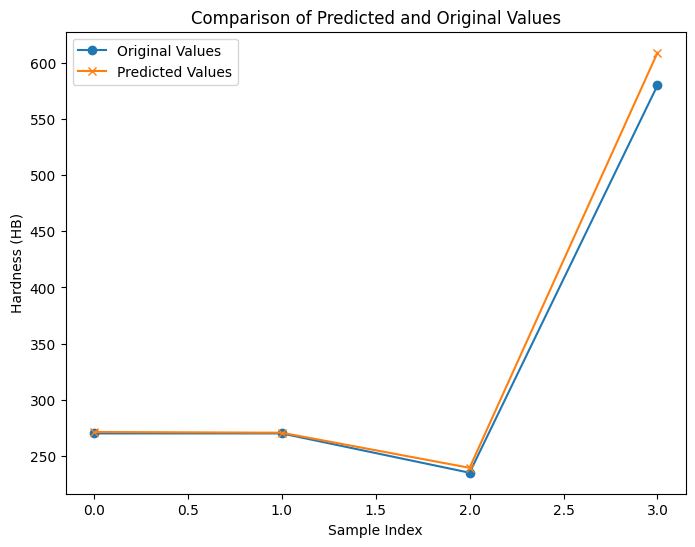

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Original Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Hardness (HB)')
plt.title('Comparison of Predicted and Original Values')
plt.legend()
plt.show()

In [54]:
# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Compute R-squared
r2_rf = r2_score(y_test, y_rf_pred)

print(f"R-squared (R²) for Random Forest: {r2_rf}")

R-squared (R²) for Random Forest: -0.40677133466167215
